# Bead Size

This module will demonstrate how to find the size of the beads in the cluster images. The pipeline will be:

- Load cluster images
- Convert image to binary
- Scale up image
- Dilate image
- Convert image to set
- Dilate image by a factor X
- Find all connected pixels in foreground using flood-fill
- Get boundary 

In [1]:
import modules.oiplib as oiplib

from skimage import morphology
import numpy as np

In [2]:
clusters = oiplib.loadImages("../images/clusters")

In [3]:
img = clusters[100]

In [4]:
labelImg = oiplib.labelRegionWatershed(img)

In [5]:
# labelImg = morphology.binary_dilation(labelImg, np.ones((10,10)))

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1ba38390>)

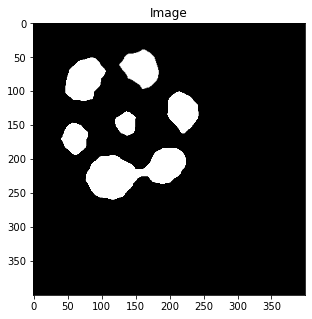

In [6]:
oiplib.showImage(labelImg, vmax=1)

In [7]:
import numpy as np

beads, areas = np.unique(labelImg, return_counts=True)

We get the estimated diameters of each bead

In [8]:
diameters = []

for area in areas[1:]:
    diameters.append(oiplib.areaToDiameter(area))

Now we compensate for the erosion performed during the watershed step

In [9]:
compensatedAreas = []

for diameter in diameters:
    compensatedAreas.append(oiplib.dilateBead(diameter, labelImg.shape))

In [10]:
compensatedDiameters = []

for area in compensatedAreas:
    compensatedDiameters.append(oiplib.areaToDiameter(area)/10)

In [11]:
compensatedDiameters

[6.434729986160063,
 6.8858870631123095,
 6.030233942197952,
 4.203874983978954,
 5.036162401186487,
 6.4781151112396085,
 7.869585214985496]

In [12]:
def pixelDiameterToSizenm(diameter):
    return diameter * 8.2

In [13]:
beadSizes = []

for diameter in compensatedDiameters:
    beadSizes.append(oiplib.pixelToLength(diameter, 8.2))

In [14]:
beadSizes

[52.76478588651251,
 56.464273917520934,
 49.4479183260232,
 34.47177486862742,
 41.296531689729186,
 53.120543912164784,
 64.53059876288106]